## **Conclusion**

1. The analysis show that there is a statistically significant difference in the average view counts between video from verified account and video from unverfied account.
2. There might be some hehavioral difference between each account. For example, do uneverified accounts tend to use clickbait title or bot account to inflate the total view counts.


In [2]:
# Import packages for data manipulation
import pandas as pd

# Import packages for data visualization
import matplotlib as plt
import seaborn as sns

# Import packages for statistical analysis/hypothesis testing
from scipy import stats


In [3]:
# Load dataset into dataframe
df = pd.read_csv("tiktok_dataset.csv")

In [4]:
# Generate a table of descriptive statistics about the data
df.describe()


,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


#### Check for and handle missing values.

In [5]:
# Check for missing values
df.isna().sum()


#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [6]:
# Drop rows with missing values

df = df.dropna(axis = 0)

In [7]:
# Display first few rows after handling missing values

df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [8]:
# Compute the mean `video_view_count` for each group in `verified_status`
df.groupby("verified_status")["video_view_count"].mean()


verified_status
not verified    265663.785339
verified         91439.164167
Name: video_view_count, dtype: float64

In [9]:
# Conduct a two-sample t-test to compare means

# Sacve each sample in a variable
not_verified = df[df["verified_status"] == "not verified"]["video_view_count"]
verified = df[df["verified_status"] == "verified"]["video_view_count"]

# Implement a t-test using the two sample
stats.ttest_ind(a = not_verified, b = verified, equal_var = False)


TtestResult(statistic=25.499441780633777, pvalue=2.6088823687177823e-120, df=1571.163074387424)

<Axes: xlabel='video_view_count', ylabel='Count'>

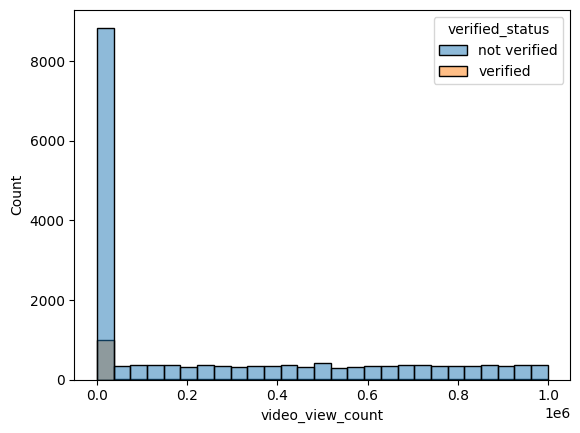

In [10]:
sns.histplot(df, x = 'video_view_count', hue = "verified_status")


In [11]:
print("Video view count > 10000 : ", df[df["video_view_count"] > 10000]["video_view_count"].count())
print("Video view count < 10000 : ", df[df["video_view_count"] < 10000]["video_view_count"].count())

Video view count > 10000 :  9512
Video view count < 10000 :  9572


<Axes: xlabel='video_view_count', ylabel='Count'>

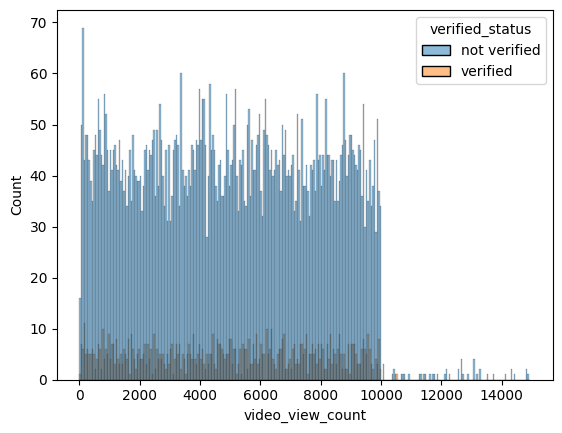

In [12]:
sns.histplot(df, x = 'video_view_count', hue = "verified_status", bins = range(0, 15000, 50))